In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import mplsoccer
import highlight_text 
from mplsoccer import Bumpy
import numpy as np

from PIL import Image
from io import BytesIO
import requests

In [3]:
df = pd.read_csv('/Users/kiramaya/Downloads/Bundesliga(1).csv')

In [4]:
df.head(34)

,Team,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8,Week 9,...,Week 25,Week 26,Week 27,Week 28,Week 29,Week 30,Week 31,Week 32,Week 33,Week 34
0,Bayern Munich,1,1,1,1,3,3,5,3,3,...,2,1,1,1,2,1,1,1,2,1
1,Borussia Dortmund,7,2,7,5,2,5,2,4,4,...,1,2,2,2,1,2,2,2,1,2
2,Union Berlin,5,5,3,2,4,1,1,1,1,...,3,3,3,3,3,3,4,4,4,4


In [5]:
df = df.T

In [6]:
df.columns = df.iloc[0]
df = df.iloc[1:]

In [7]:
week = ['Week ' + str(num) for num in range(1,35)]

In [8]:
highlight_dict = {
    'Bayern Munich':'red',
    'Borussia Dortmund':'yellow',
    'Union Berlin':'white'
}

In [9]:
bumpy = Bumpy(
    scatter_color = '#282828', line_color = '#252525',
    rotate_xticks=90,
    ticklabel_size = 15,
    scatter_primary = 'D',
    show_right = True,
    plot_labels = True,
    alignment_yvalue=.1,
    alignment_xvalue = .065
)

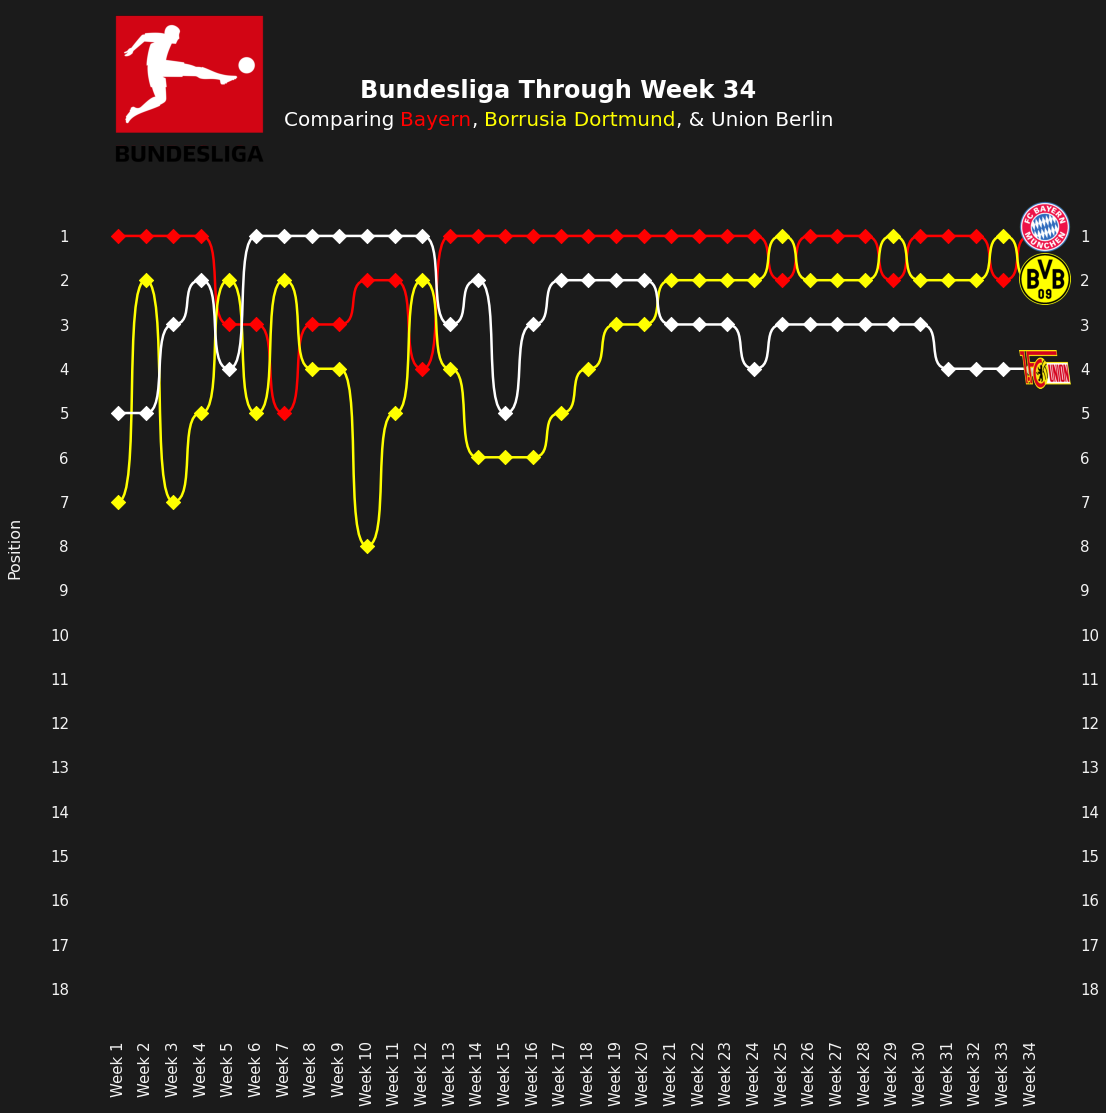

In [50]:
fig,ax = bumpy.plot(
    x_list = week,
    y_list = np.linspace(1,18,18).astype(int),
    values = df,
    secondary_alpha = .5,
    highlight_dict = highlight_dict,
    figsize = (18,18),
    ylim = (-.1,22),
    lw = 2.5
)
ax.set_ylabel('Position', fontsize=16,labelpad=50, ha='center')
ax.yaxis.set_label_coords(-0.05, 0.5)

fig.text(s = 'Bundesliga Through Week 34',x = .5, y = .85,
         c = 'white',size=24,weight='bold',ha='center'
        )

highlight_text.fig_text(x=.5, y= .84, 
                       s = 'Comparing <Bayern>, <Borrusia Dortmund>, & <Union Berlin>',
                       highlight_textprops = [
                           {"color":'red'},
                           {"color":'yellow'},
                           {"color":'white'}  
                       ],
                        fontsize = 20,
                        color = 'white',
                        ha='center'
                       )

ax2 = fig.add_axes([.15,.79,.13,.13])
ax2.axis('off')
img = Image.open('/Users/kiramaya/Downloads/bundesliga-logo.png')
ax2.imshow(img)



ax2 = fig.add_axes([.855,.73,.04,.04])
ax2.axis('off')
img = Image.open('/Users/kiramaya/Downloads/584d8683367b6a13e54477d4.png')
img_resized = img.resize((300, 300))
ax2.imshow(img_resized)

ax2 = fig.add_axes([.855,.69,.04,.04])
ax2.axis('off')
img = Image.open('/Users/kiramaya/Downloads/584d8678367b6a13e54477d3.png')
img_resized = img.resize((300, 300))
ax2.imshow(img_resized)

ax2 = fig.add_axes([.855,.62,.04,.04])
ax2.axis('off')
img = Image.open('/Users/kiramaya/Downloads/2560px-1._FC_Union_Berlin_logo.png')
img_resized = img.resize((400, 300))
ax2.imshow(img_resized)


In [51]:
fig.savefig('/Users/kiramaya/Downloads/graph_image.png', dpi=300)